## Statistical analysis using SciPy and statsmodels

In [31]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### **Step 1: Setup and Dataset Loading**

In [33]:
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### **Step 2: Descriptive Statistics**

In [35]:
# Descriptive statistics for 'total_bill' and 'tip'
columns = ['total_bill', 'tip']

for col in columns:
    print(f"Statistics for {col}:")
    print(f"Mean: {tips[col].mean()}")
    print(f"Median: {tips[col].median()}")
    print(f"Variance: {tips[col].var()}")
    print(f"Standard Deviation: {tips[col].std()}")
    print(f"Skewness: {stats.skew(tips[col])}")
    print(f"Kurtosis: {stats.kurtosis(tips[col])}\n")

Statistics for total_bill:
Mean: 19.78594262295082
Median: 17.795
Variance: 79.25293861397826
Standard Deviation: 8.902411954856856
Skewness: 1.1262346334818638
Kurtosis: 1.1691681323851366

Statistics for tip:
Mean: 2.99827868852459
Median: 2.9
Variance: 1.9144546380624725
Standard Deviation: 1.3836381890011826
Skewness: 1.4564266884221506
Kurtosis: 3.5495519893455114



### **Step 3: Hypothesis Testing**

#### **3.1 T-Test: Smokers vs. Non-Smokers**

In [37]:
# Separate tips for smokers and non-smokers
smokers = tips[tips['smoker'] == 'Yes']['tip']
non_smokers = tips[tips['smoker'] == 'No']['tip']

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(smokers, non_smokers)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: 0.09222805186888201, P-Value: 0.9265931522244976


#### **3.2 Correlation Analysis**

In [39]:
# Pearson correlation between total_bill and tip
corr, p_val = stats.pearsonr(tips['total_bill'], tips['tip'])
print(f"Correlation Coefficient: {corr}, P-Value: {p_val}")

Correlation Coefficient: 0.6757341092113645, P-Value: 6.692470646863819e-34


#### **3.3 ANOVA Test**

In [41]:
# Perform ANOVA for total_bill across days
anova_result = stats.f_oneway(
    tips[tips['day'] == 'Thur']['total_bill'],
    tips[tips['day'] == 'Fri']['total_bill'],
    tips[tips['day'] == 'Sat']['total_bill'],
    tips[tips['day'] == 'Sun']['total_bill']
)
print(f"F-Statistic: {anova_result.statistic}, P-Value: {anova_result.pvalue}")

F-Statistic: 2.7674794432863363, P-Value: 0.04245383328952047


### **Step 4: Regression Analysis**

In [43]:
# Prepare data for regression
X = tips['total_bill']
y = tips['tip']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 28 Dec 2024   Prob (F-statistic):           6.69e-34
Time:                        17:24:40   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

### **Step 5: Distribution Fitting**

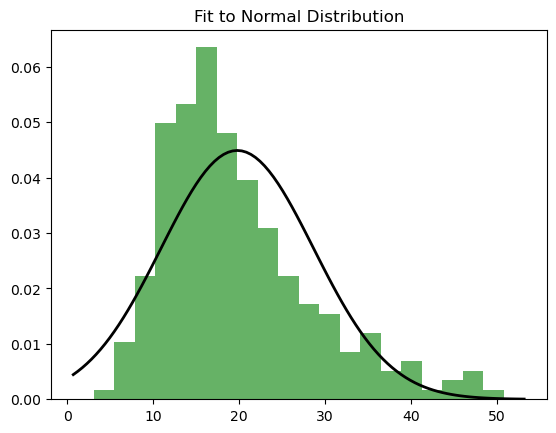

Kolmogorov-Smirnov Test Statistic: 0.1188459508899175, P-Value: 0.0018463244831193226


In [45]:
# Fit total_bill to a normal distribution
mean, std = stats.norm.fit(tips['total_bill'])

# Plot histogram and PDF
plt.hist(tips['total_bill'], bins=20, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit to Normal Distribution")
plt.show()

# Perform goodness-of-fit test
stat, p_val = stats.kstest(tips['total_bill'], 'norm', args=(mean, std))
print(f"Kolmogorov-Smirnov Test Statistic: {stat}, P-Value: {p_val}")

### **Interpreting Results**

1. **Descriptive Statistics:** Understand the data's distribution and shape.
2. **Hypothesis Testing:**

    a. **T-Test:** Determine if smoking affects tipping.
    b. **Correlation:** Evaluate the strength and direction of the relationship between total bill and tip.
    c. **ANOVA:** Check if the day of the week impacts spending.

3. **Regression Analysis:** Assess the relationship between total bill and tip, including model significance.
4. **Distribution Fitting:** Evaluate if total_bill follows a normal distribution.